In [1]:
#!/usr/bin/python
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("ticks")

#for mem
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
#read in clean data
dfi = pd.read_csv('data/sep2023-update/wideout.csv')
df1 = pd.read_csv('data/sep2023-update/wideout-pre1yr.csv')
df2 = pd.read_csv('data/sep2023-update/wideout-post1yr.csv')
#df = dfi[dfi['co']=='OPH'] #just select OPH for now

In [3]:
dfi.columns

Index(['Unnamed: 0', 'short_id', 'agemo_at_ART', 'f/m', 'ARTregimen',
       'time_ART_mo', 'log10VL', 'cens_vl', 'log10CD4', 'log10int',
       'cens_intact', 'log10def', 'log10ratio'],
      dtype='object')

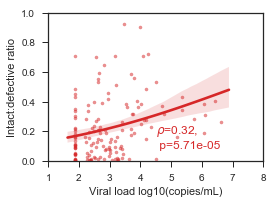

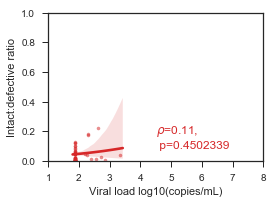

In [4]:
#correlation of VL and I:D ratio

for i,dfti in enumerate([df1,df2]):

    plt.figure(figsize=(4,3))

    dfti = dfti[['log10VL','log10ratio']].dropna()
    
    plt.scatter(dfti['log10VL'],10**dfti['log10ratio'],color='tab:red',alpha=0.5,s=10,)
    sns.regplot(dfti['log10VL'],10**dfti['log10ratio'],color='tab:red',scatter=False,logistic=True)
    #plt.semilogy()
    plt.xlim([1,8])
    plt.ylim([0,1])

    plt.xlabel('Viral load log10(copies/mL)')
    plt.ylabel('Intact:defective ratio')

    rho,p=st.spearmanr(dfti['log10VL'],10**dfti['log10ratio'])
    plt.annotate(r'$\rho$='+str(np.round(rho,2))+',\n p='+str(np.round(p,7)),[4.5,0.1],color='tab:red')

    plt.tight_layout()
    plt.savefig('figures/corr_VL_vs_ratio-phase'+str(i)+'.pdf',dpi=600)



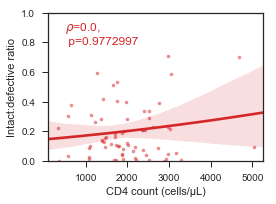

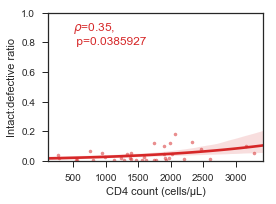

In [5]:
#correlation of VL and I:D ratio

for i,dfti in enumerate([df1,df2]):

    plt.figure(figsize=(4,3))

    dfti = dfti[['log10CD4','log10ratio']].dropna()
    
    x,y=10**dfti['log10CD4'],10**dfti['log10ratio']
    
    plt.scatter(x,y,color='tab:red',alpha=0.5,s=10,)
    sns.regplot(x,y,color='tab:red',scatter=False,logistic=True)
    #plt.semilogy()
    #plt.xlim([1,8])
    plt.ylim([0,1])

    plt.xlabel('CD4 count (cells/µL)')
    plt.ylabel('Intact:defective ratio')

    rho,p=st.spearmanr(x,y)
    plt.annotate(r'$\rho$='+str(np.round(rho,2))+',\n p='+str(np.round(p,7)),[500,0.8],color='tab:red')

    plt.tight_layout()
    plt.savefig('figures/corr_CD4_vs_ratio-phase'+str(i)+'.pdf',dpi=600)



0.3663676616939486
0.4135423589416052


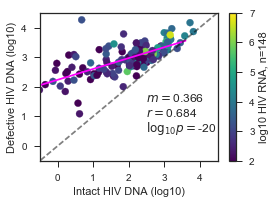

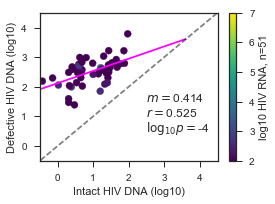

In [6]:
#correlate some things more carefully

for i,dfti in enumerate([df1,df2]):
    tdf = dfti[['log10int','log10def','log10VL']].dropna()

    x,y=tdf['log10int'].values,tdf['log10def'].values

    z=tdf['log10VL'].values

    m,y0 = np.polyfit(x,y,1)
    r,p = st.pearsonr(x,y)

    print(m)

    plt.figure(figsize=(4,3))
    xx=np.linspace(-1,5,10) #for the whole y=x line
    xxm=np.linspace(-1,3.6,10) #the pink model, stop at line y=x
    
    plt.scatter(x,y,c=z,cmap='viridis',vmin=2,vmax=7)
    cbar = plt.colorbar()

    #cbar.ax.set_yticklabels(['0','1','2','>3'])
    cbar.set_label('log10 HIV RNA, n='+str(len(z)))#, rotation=270)
    #plt.title('log10 HIV RNA, n='+str(len(z)))

    plt.plot(xxm,xxm*m+y0,color='magenta')
    plt.plot(xx,xx,ls='--',color='k',alpha=0.5)

    plt.annotate(r'$m=$'+str(round(m,3)),[2.5,1.5])
    plt.annotate(r'$r=$'+str(round(r,3)),[2.5,1.])
    plt.annotate(r'$\log_{10}p=$'+str(int(np.log10(p))),[2.5,0.5])

    plt.xlabel('Intact HIV DNA (log10)')
    plt.ylabel('Defective HIV DNA (log10)')
    plt.xticks(range(5))
    plt.yticks(range(5))
    plt.ylim([-0.5,4.5])
    plt.xlim([-0.5,4.5])

    plt.tight_layout()
    plt.savefig('figures/corr_int_vs_def'+str(i)+'.pdf',dpi=600)

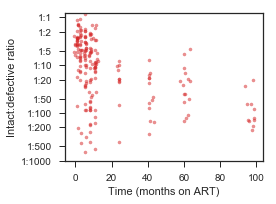

In [42]:
plt.figure(figsize=(4,3))

#plt.scatter(df['ART_mo'],df['ratio'],c=df['ARTregimen'],cmap='viridis',alpha=0.5,s=10,)
#plt.scatter(df['ART_mo'],df['ratio'],c=df['f/m'],cmap='viridis',alpha=0.5,s=10,)
#plt.scatter(df['ART_mo'],df['ratio'],c=df['agemo_at_ART'],cmap='viridis',alpha=1,s=10,)
plt.scatter(dfi['time_ART_mo'],dfi['log10ratio'],c='tab:red',alpha=0.5,s=10,)

plt.xlabel('Time (months on ART)')
plt.ylabel('Intact:defective ratio')
plt.ylim([-3,0.1])
plt.yticks([-3,np.log10(1/500),np.log10(1/200),-2,np.log10(1/50),np.log10(1/20),-1,np.log10(1/5),np.log10(1/2),0,],
           ['1:1000','1:500','1:200','1:100','1:50','1:20','1:10','1:5','1:2','1:1'])

plt.tight_layout()
plt.savefig('figures/ratio.pdf',dpi=600)

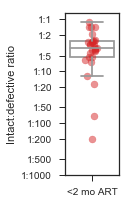

In [41]:
plt.figure(figsize=(2,3))

tdf1=dfi[dfi['time_ART_mo']<2]
#tdf3=dfi[dfi['time_ART_mo']<3]
sns.boxplot(y=tdf1['log10ratio'],color='white',fliersize=0)
plt.scatter(np.random.normal(0,0.05,len(tdf1)),tdf1['log10ratio'],c='tab:red',alpha=0.5,s=50,)
#plt.scatter(np.ones(len(tdf3))+1,tdf3['log10ratio'],c='tab:red',alpha=0.5,s=10,)


plt.ylabel('Intact:defective ratio')
plt.yticks([-3,np.log10(1/500),np.log10(1/200),-2,np.log10(1/50),np.log10(1/20),-1,np.log10(1/5),np.log10(1/2),0,],
           ['1:1000','1:500','1:200','1:100','1:50','1:20','1:10','1:5','1:2','1:1'])
plt.xticks([0],['<2 mo ART'])
plt.tight_layout()
plt.savefig('figures/ratio-early.pdf',dpi=600)

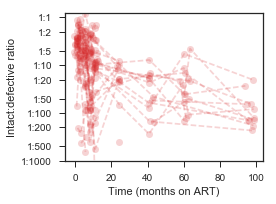

In [8]:
plt.figure(figsize=(4,3))

for ip,pid in enumerate(dfi['short_id'].unique()):
    tdf = dfi[dfi['short_id']==pid]
    tdf=tdf[['time_ART_mo','log10ratio']].dropna()
    plt.plot(tdf['time_ART_mo'],tdf['log10ratio'],color='tab:red',marker='o',ls='--',alpha=0.2)

plt.xlabel('Time (months on ART)')
plt.ylabel('Intact:defective ratio')
plt.ylim([-3,0.1])
plt.yticks([-3,np.log10(1/500),np.log10(1/200),-2,np.log10(1/50),np.log10(1/20),-1,np.log10(1/5),np.log10(1/2),0,],
           ['1:1000','1:500','1:200','1:100','1:50','1:20','1:10','1:5','1:2','1:1'])

plt.tight_layout()
plt.savefig('figures/ratio2.pdf',dpi=600)

[-0.14471336595166626, -0.1994492997919292, -0.0899774321114033, -1.4786125531096654, -1.9707890658979745, -0.9864360403213562]
[-0.018077358766901468, -0.028362526125207364, -0.007792191408595571, -2.599078546761077, -3.2287264920947, -1.9694306014274536]


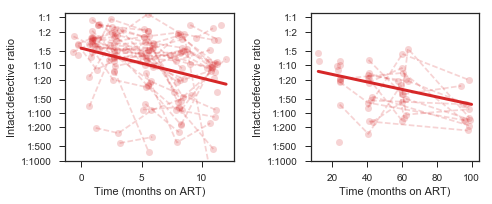

In [9]:
#ratio for first year and then therafter
plt.figure(figsize=(7,3))


simt1=np.linspace(0,12,100)
simt2=np.linspace(12,100,100)

simt=[simt1,simt2]
#loop over <1yr and >1yr
for i,dfdf in enumerate([df1,df2]):
    
    dfdf['lratio']=np.log(10**dfdf['log10ratio'])
    
    plt.subplot(121+i)
    for ip,pid in enumerate(dfdf['short_id'].unique()):
        tdf = dfdf[dfdf['short_id']==pid]
        tdf=tdf[['time_ART_mo','log10ratio']].dropna()
        plt.plot(tdf['time_ART_mo'],tdf['log10ratio'],color='tab:red',marker='o',ls='--',alpha=0.2)

    df_hl = dfdf[['lratio','time_ART_mo','short_id']].dropna()
    md = smf.mixedlm('lratio ~ time_ART_mo', df_hl, groups=df_hl['short_id'])
    mdf = md.fit()
    mem_results=[mdf.params[1],mdf.conf_int().iloc[1,0],mdf.conf_int().iloc[1,1],
                 mdf.params[0],mdf.conf_int().iloc[0,0],mdf.conf_int().iloc[0,1]]

    print(mem_results)
    plt.xlabel('Time (months on ART)')
    plt.ylabel('Intact:defective ratio')
    plt.ylim([-3,0.1])
    plt.yticks([-3,np.log10(1/500),np.log10(1/200),-2,np.log10(1/50),np.log10(1/20),-1,np.log10(1/5),np.log10(1/2),0,],
               ['1:1000','1:500','1:200','1:100','1:50','1:20','1:10','1:5','1:2','1:1'])

    #plot
    plt.plot(simt[i],np.log10(np.exp(mem_results[3]+mem_results[0]*(simt[i]-min(simt[i])))),color='tab:red',lw=3)
    #plt.fill_between(simt2,np.exp(mem_results[4]+mem_results[1]*simt2s),np.exp(mem_results[5]+mem_results[2]*simt2s),color=cz,alpha=0.5,lw=1)

plt.tight_layout()
plt.savefig('figures/ratio3.pdf',dpi=600)

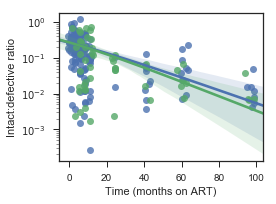

In [10]:
dfy=dfi[dfi['agemo_at_ART']<6]
dfo=dfi[dfi['agemo_at_ART']>6]

plt.figure(figsize=(4,3))

sns.regplot(dfy['time_ART_mo'],10**dfy['log10ratio'],logistic=True)
sns.regplot(dfo['time_ART_mo'],10**dfo['log10ratio'],logistic=True)

plt.xlabel('Time (months on ART)')
plt.ylabel('Intact:defective ratio')
#plt.ylim([-3,0.1])
#plt.xlim([0,12])
plt.semilogy()

plt.tight_layout()
plt.savefig('figures/ratio-yo.pdf',dpi=600)

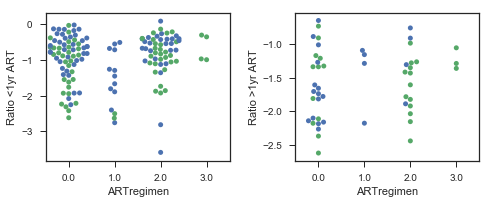

In [47]:
#ratio by ART regimen

plt.figure(figsize=(7,3))

plt.subplot(121)
sns.swarmplot(data=df1,x='ARTregimen',y='log10ratio',hue='f/m',s=5)
#plt.xticks(range(4),df['ARTregimen'].unique(),rotation=90)
plt.ylabel('Ratio <1yr ART')
plt.legend('')

plt.subplot(122)
sns.swarmplot(data=df2,x='ARTregimen',y='log10ratio',hue='f/m',s=5)
#plt.xticks(range(4),df['haart_start_sregimen'].unique(),rotation=90)
plt.ylabel('Ratio >1yr ART')
plt.legend('')

plt.tight_layout()

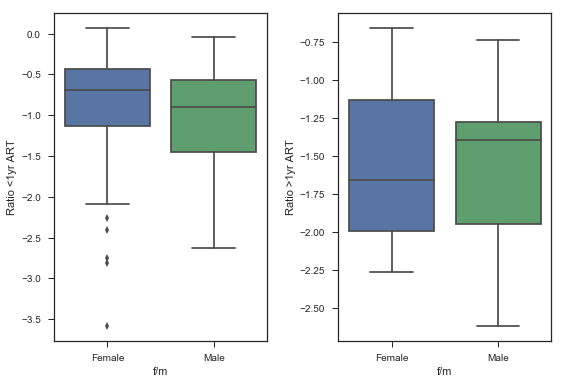

In [49]:
#ratio by male/female

plt.subplot(121)
sns.boxplot(data=df1,x='f/m',y='log10ratio')
plt.xticks(range(2),['Female','Male'])
plt.ylabel('Ratio <1yr ART')

plt.subplot(122)
sns.boxplot(data=df2,x='f/m',y='log10ratio')
plt.xticks(range(2),['Female','Male'])
plt.ylabel('Ratio >1yr ART')

plt.tight_layout()

SpearmanrResult(correlation=-0.18237839622038696, pvalue=0.026516836330382595)

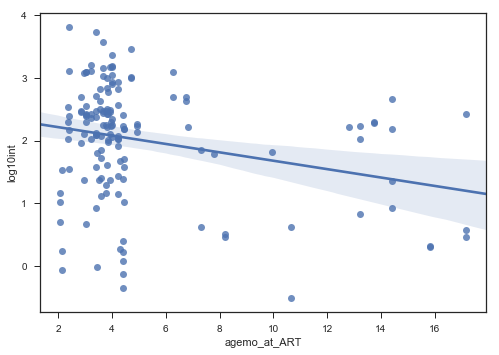

In [50]:
sns.regplot(df1['agemo_at_ART'],df1['log10int'])

tdf = df1[['agemo_at_ART','log10int']].dropna()
st.spearmanr(tdf['agemo_at_ART'],tdf['log10int'])

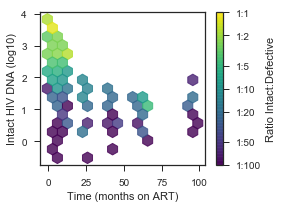

In [120]:
plt.figure(figsize=(4,3))

plt.hexbin(df['ART_mo'],df['log10int'],gridsize=15,C=df['ratio'],cmap='viridis',alpha=0.8,vmin=-2,vmax=0)
plt.xlabel('Time (months on ART)')
plt.ylabel('Intact HIV DNA (log10)')
cbar=plt.colorbar()
cbar.set_label('Ratio Intact:Defective')
cbar.set_ticks([-2,np.log10(1/50),np.log10(1/20),-1,np.log10(1/5),np.log10(1/2),0])
cbar.set_ticklabels(['1:100','1:50','1:20','1:10','1:5','1:2','1:1'])
plt.tight_layout()
plt.savefig('figures/hexbin_ratio.pdf',dpi=600)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


0.29498020953581194


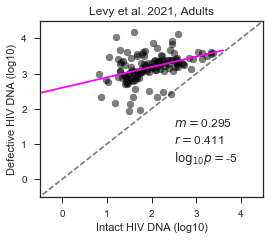

In [53]:
dfA2=pd.read_csv('data/Adult_assay2.csv')

dfA2['log10int']=np.log10(dfA2['DSI_corrected_per_1E6_T_cells'])
dfA2['log10def']=np.log10(dfA2['total_HIV_copies_per_1E6_T_cells']-dfA2['DSI_corrected_per_1E6_T_cells'])

tdf=dfA2[['log10int','log10def']].dropna()

tdf = tdf[tdf['log10int']>0]

x,y=tdf['log10int'],tdf['log10def']

m,y0 = np.polyfit(x,y,1)
r,p = st.pearsonr(x,y)

print(m)

plt.figure(figsize=(4.,3.5))
xx=np.linspace(-1,5,10)
xxm=np.linspace(-1,3.6,10)
plt.scatter(x,y,color='black',alpha=0.5)

plt.plot(xxm,xxm*m+y0,color='magenta')
plt.plot(xx,xx,ls='--',color='k',alpha=0.5)

plt.annotate(r'$m=$'+str(round(m,3)),[2.5,1.5])
plt.annotate(r'$r=$'+str(round(r,3)),[2.5,1.])
plt.annotate(r'$\log_{10}p=$'+str(int(np.log10(p))),[2.5,0.5])

plt.xlabel('Intact HIV DNA (log10)')
plt.ylabel('Defective HIV DNA (log10)')
plt.xticks(range(5))
plt.yticks(range(5))
plt.ylim([-0.5,4.5])
plt.xlim([-0.5,4.5])
plt.title('Levy et al. 2021, Adults')

plt.tight_layout()
plt.savefig('figures/corr_int_vs_def_adults.pdf',dpi=600)

In [ ]:
#check on blips vs reservoir size

